In [1]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_purchase=pd.read_csv('purchase data.csv')

In [3]:
df_purchase

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Import Segmentation Model

In [5]:
scaler=pickle.load(open('scaler.pickle','rb'))
pca=pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [6]:
features=df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std=scaler.transform(features)

## PCA

In [7]:
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

## K-means PCA

In [8]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

In [9]:
df_purchase_predictors=df_purchase.copy()

In [10]:
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca

# Descriptive Analysis by Segments

## Data Analysis by Customer

In [11]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [12]:
temp1=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).count()
temp1=temp1.set_index('ID')
temp1=temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [13]:
temp2=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()
temp2=temp2.set_index('ID')
temp2=temp2.rename(columns={'Incidence':'N_Purchase'})
temp3=temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchase
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [14]:
temp3['Average_N_Purchase']=temp3['N_Purchase']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchase,Average_N_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [15]:
temp4=df_purchase_predictors[['ID','Segment']].groupby(['ID'],as_index=False).mean()
temp4=temp4.set_index('ID')
df_purchase_descr=temp3.join(temp4)

In [16]:
df_purchase_descr.head()

,N_Visits,N_Purchase,Average_N_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


## Segment Properties

In [17]:
segm_prop=df_purchase_descr[['N_Purchase','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop=segm_prop.rename(columns={'N_Purchase':'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


Text(0.5, 1.0, 'Segment Proportions')

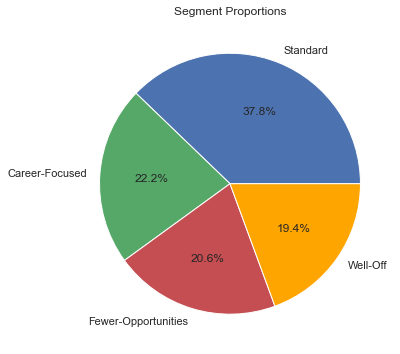

In [18]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

## Purchase Occasion and Purchase Incidence

In [20]:
segments_mean=df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchase,Average_N_Purchase
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [21]:
segments_std=df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Numeber of Store Visits by Segment')

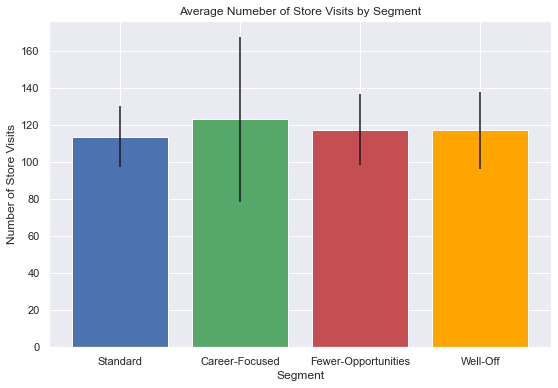

In [22]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career-Focused','Fewer-Opportunities','Well-Off'),
       height=segments_mean['N_Visits'],
       yerr=segments_std['N_Visits'],
       color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title("Average Numeber of Store Visits by Segment")

Text(0.5, 1.0, 'Average Numeber of Purchases by Segment')

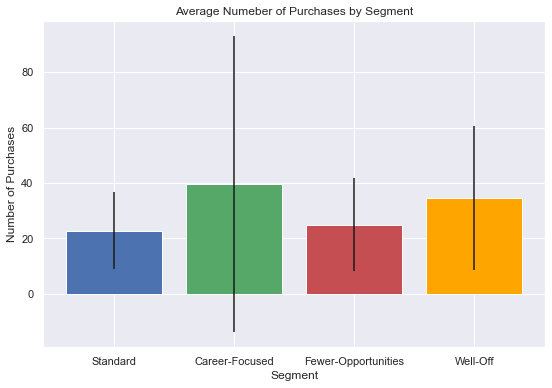

In [24]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career-Focused','Fewer-Opportunities','Well-Off'),
       height=segments_mean['N_Purchase'],
       yerr=segments_std['N_Purchase'],
       color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title("Average Numeber of Purchases by Segment")

Text(0.5, 1.0, 'Average Numeber of Purchases by Segment')

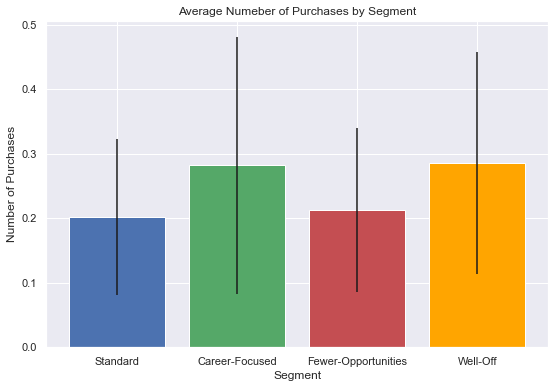

In [25]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career-Focused','Fewer-Opportunities','Well-Off'),
       height=segments_mean['Average_N_Purchase'],
       yerr=segments_std['Average_N_Purchase'],
       color=('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title("Average Numeber of Purchases by Segment")

## Brand Choice

In [26]:
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [27]:
brand_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix="Brand",prefix_sep='_')
brand_dummies['Segement'],brand_dummies['ID']=df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segement,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [28]:
temp=brand_dummies.groupby(['ID'],as_index=True).mean()

In [30]:
mean_brand_choice=temp.groupby(['Segement'],as_index=True).mean()

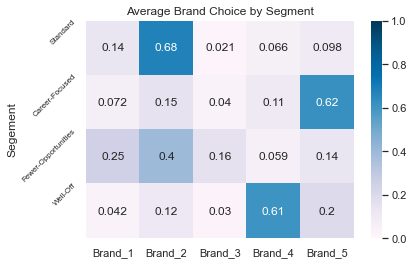

In [31]:
sns.heatmap(mean_brand_choice,
           vmin=0,
           vmax=1,
           cmap='PuBu',
           annot=True)
plt.yticks([0,1,2,3],['Standard','Career-Focused','Fewer-Opportunities','Well-Off'],rotation=45,fontsize=8)
plt.title('Average Brand Choice by Segment')
plt.show()

## Revenue

In [39]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [40]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [41]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [42]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [43]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Annaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [44]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13909.78,722.06,1805.59,2214.82,20911.15
1,1,736.09,1791.78,664.75,2363.84,19456.74,25013.20
2,2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,3,699.47,1298.23,725.54,14009.29,5509.69,22242.22


In [45]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
Career-Focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
Fewer-Opportunities,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Well-Off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194
